# Chaos Control: The OGY Method

## Introduction

The **Ott-Grebogi-Yorke (OGY) method**, introduced in 1990, represents a landmark achievement in nonlinear dynamics. It demonstrated that chaotic systems, despite their apparent unpredictability, can be controlled with remarkably small perturbations. This counterintuitive result revolutionized our understanding of chaos and opened practical applications in physics, engineering, and biology.

## Theoretical Foundation

### Chaotic Attractors and Unstable Periodic Orbits

A chaotic attractor contains infinitely many **unstable periodic orbits (UPOs)**. These orbits are embedded within the chaotic sea and represent potential targets for stabilization. A key insight of the OGY method is that:

> *Any unstable periodic orbit within a chaotic attractor can be stabilized using only small, carefully timed perturbations to an accessible system parameter.*

### The Control Strategy

Consider a discrete-time dynamical system (map):

$$\mathbf{x}_{n+1} = \mathbf{F}(\mathbf{x}_n, p)$$

where $\mathbf{x}_n \in \mathbb{R}^m$ is the state vector and $p$ is a control parameter that can be adjusted within a small range $|p - p_0| < \delta$.

Let $\mathbf{x}_F$ be a fixed point (period-1 UPO) of the unperturbed system satisfying:

$$\mathbf{x}_F = \mathbf{F}(\mathbf{x}_F, p_0)$$

### Linearization Near the Fixed Point

Linearizing about $\mathbf{x}_F$:

$$\mathbf{x}_{n+1} - \mathbf{x}_F \approx \mathbf{J} (\mathbf{x}_n - \mathbf{x}_F) + \mathbf{g} (p_n - p_0)$$

where:
- $\mathbf{J} = \frac{\partial \mathbf{F}}{\partial \mathbf{x}}\bigg|_{\mathbf{x}_F, p_0}$ is the Jacobian matrix
- $\mathbf{g} = \frac{\partial \mathbf{F}}{\partial p}\bigg|_{\mathbf{x}_F, p_0}$ is the parameter sensitivity vector

### Eigenvalue Analysis

For a 2D map, the Jacobian has eigenvalues $\lambda_s$ (stable, $|\lambda_s| < 1$) and $\lambda_u$ (unstable, $|\lambda_u| > 1$) with corresponding eigenvectors $\mathbf{e}_s$ and $\mathbf{e}_u$.

The fixed point also moves with the parameter:

$$\frac{d\mathbf{x}_F}{dp} = (\mathbf{I} - \mathbf{J})^{-1} \mathbf{g}$$

### The OGY Control Law

The key idea is to choose $p_n$ such that the next iterate lands on the stable manifold of the fixed point. This leads to the control law:

$$p_n - p_0 = -\frac{\lambda_u (\mathbf{f}_u \cdot \boldsymbol{\xi}_n)}{\mathbf{f}_u \cdot \left[ \mathbf{g} - \lambda_u \frac{d\mathbf{x}_F}{dp} \right]}$$

where:
- $\boldsymbol{\xi}_n = \mathbf{x}_n - \mathbf{x}_F$ is the deviation from the fixed point
- $\mathbf{f}_u$ is the contravariant (left) eigenvector satisfying $\mathbf{f}_u \cdot \mathbf{e}_s = 0$ and $\mathbf{f}_u \cdot \mathbf{e}_u = 1$

### Simplified Form for 2D Maps

For practical implementation, the control perturbation can be written as:

$$\delta p_n = -\mathbf{K} \cdot (\mathbf{x}_n - \mathbf{x}_F)$$

where $\mathbf{K}$ is the feedback gain vector computed from the eigenstructure.

## The Hénon Map: A Test Case

We demonstrate the OGY method on the **Hénon map**, a canonical example of a 2D chaotic system:

$$x_{n+1} = 1 - a x_n^2 + y_n$$
$$y_{n+1} = b x_n$$

For the classical parameters $a = 1.4$ and $b = 0.3$, this map exhibits a strange attractor with a fractal structure.

### Fixed Points

The fixed points satisfy $x = 1 - ax^2 + y$ and $y = bx$, giving:

$$x_F = \frac{-(1-b) + \sqrt{(1-b)^2 + 4a}}{2a}$$
$$y_F = b x_F$$

### Jacobian and Eigenvalues

The Jacobian at the fixed point is:

$$\mathbf{J} = \begin{pmatrix} -2ax_F & 1 \\ b & 0 \end{pmatrix}$$

with eigenvalues:

$$\lambda_{\pm} = \frac{-2ax_F \pm \sqrt{4a^2x_F^2 + 4b}}{2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13

print("Chaos Control: OGY Method Implementation")
print("=" * 45)

Chaos Control: OGY Method Implementation


In [2]:
class HenonMap:
    """Hénon map with OGY control capability."""
    
    def __init__(self, a=1.4, b=0.3):
        self.a0 = a  # Nominal parameter value
        self.b = b
        self._compute_fixed_point()
        self._compute_control_parameters()
    
    def _compute_fixed_point(self):
        """Compute the fixed point of the Hénon map."""
        a, b = self.a0, self.b
        # x = 1 - a*x^2 + b*x => a*x^2 + (1-b)*x - 1 = 0
        # Wait, let me recalculate: x = 1 - a*x^2 + y, y = b*x
        # So x = 1 - a*x^2 + b*x => a*x^2 - b*x + x - 1 = 0
        # a*x^2 + (1-b)*x - 1 = 0
        discriminant = (1 - b)**2 + 4*a
        self.x_f = (-(1 - b) + np.sqrt(discriminant)) / (2 * a)
        self.y_f = b * self.x_f
        self.fixed_point = np.array([self.x_f, self.y_f])
        print(f"Fixed point: ({self.x_f:.6f}, {self.y_f:.6f})")
    
    def _compute_control_parameters(self):
        """Compute Jacobian, eigenvalues, and control gain."""
        a, b = self.a0, self.b
        
        # Jacobian at fixed point
        self.J = np.array([[-2*a*self.x_f, 1],
                          [b, 0]])
        
        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(self.J)
        
        # Sort by magnitude (stable first)
        idx = np.argsort(np.abs(eigenvalues))
        self.lambda_s = eigenvalues[idx[0]]
        self.lambda_u = eigenvalues[idx[1]]
        self.e_s = eigenvectors[:, idx[0]]
        self.e_u = eigenvectors[:, idx[1]]
        
        print(f"Stable eigenvalue: λ_s = {self.lambda_s:.6f}")
        print(f"Unstable eigenvalue: λ_u = {self.lambda_u:.6f}")
        
        # Parameter sensitivity: dF/da at fixed point
        # F1 = 1 - a*x^2 + y => dF1/da = -x^2
        # F2 = b*x => dF2/da = 0
        self.g = np.array([-self.x_f**2, 0])
        
        # Movement of fixed point with parameter
        # dx_F/da from implicit differentiation
        I = np.eye(2)
        self.dx_f_da = np.linalg.solve(I - self.J, self.g)
        
        # Contravariant eigenvector (left eigenvector for unstable direction)
        # f_u · e_s = 0, f_u · e_u = 1
        # This is found from the left eigenvector of J
        _, left_eigvecs = np.linalg.eig(self.J.T)
        f_u_raw = left_eigvecs[:, idx[1]]
        # Normalize so that f_u · e_u = 1
        self.f_u = f_u_raw / np.dot(f_u_raw, self.e_u)
        
        # Control gain vector
        denominator = np.dot(self.f_u, self.g - self.lambda_u * self.dx_f_da)
        self.K = (self.lambda_u / denominator) * self.f_u
        
        print(f"Control gain K: [{self.K[0]:.6f}, {self.K[1]:.6f}]")
    
    def iterate(self, x, y, a=None):
        """Single iteration of the Hénon map."""
        if a is None:
            a = self.a0
        x_new = 1 - a * x**2 + y
        y_new = self.b * x
        return x_new, y_new
    
    def compute_control(self, x, y, max_perturbation=0.05):
        """Compute OGY control perturbation."""
        xi = np.array([x - self.x_f, y - self.y_f])
        delta_a = -np.dot(self.K, xi)
        # Clip to maximum allowed perturbation
        delta_a = np.clip(delta_a, -max_perturbation, max_perturbation)
        return delta_a

# Create the Hénon map system
henon = HenonMap(a=1.4, b=0.3)

Fixed point: (0.631354, 0.189406)
Stable eigenvalue: λ_s = 0.155946
Unstable eigenvalue: λ_u = -1.923739
Control gain K: [2.910867, -1.513130]


In [3]:
def simulate_henon(henon, n_iterations, control_start=None, 
                   control_radius=0.1, max_perturbation=0.05):
    """
    Simulate Hénon map with optional OGY control.
    
    Parameters:
    -----------
    henon : HenonMap
        The Hénon map system
    n_iterations : int
        Total number of iterations
    control_start : int or None
        Iteration at which to start control (None = no control)
    control_radius : float
        Maximum distance from fixed point to apply control
    max_perturbation : float
        Maximum allowed parameter perturbation
    
    Returns:
    --------
    x, y : arrays of state trajectory
    a_values : array of parameter values used
    control_active : boolean array indicating when control was applied
    """
    x = np.zeros(n_iterations)
    y = np.zeros(n_iterations)
    a_values = np.zeros(n_iterations)
    control_active = np.zeros(n_iterations, dtype=bool)
    
    # Initial condition (on the attractor)
    x[0], y[0] = 0.1, 0.1
    
    # Transient removal
    for _ in range(1000):
        x[0], y[0] = henon.iterate(x[0], y[0])
    
    for i in range(n_iterations - 1):
        a = henon.a0
        
        # Apply control if enabled and within control radius
        if control_start is not None and i >= control_start:
            dist = np.sqrt((x[i] - henon.x_f)**2 + (y[i] - henon.y_f)**2)
            if dist < control_radius:
                delta_a = henon.compute_control(x[i], y[i], max_perturbation)
                a = henon.a0 + delta_a
                control_active[i] = True
        
        a_values[i] = a
        x[i+1], y[i+1] = henon.iterate(x[i], y[i], a)
    
    return x, y, a_values, control_active

print("Simulation function defined.")

Simulation function defined.


In [4]:
# Simulation parameters
n_total = 2000
control_start = 500
control_radius = 0.15
max_perturbation = 0.05

# Run simulation with control
x, y, a_vals, ctrl = simulate_henon(
    henon, n_total, 
    control_start=control_start,
    control_radius=control_radius,
    max_perturbation=max_perturbation
)

# Run simulation without control for comparison
x_nc, y_nc, _, _ = simulate_henon(henon, n_total, control_start=None)

print(f"\nSimulation complete: {n_total} iterations")
print(f"Control activated at iteration {control_start}")
print(f"Control was applied {np.sum(ctrl)} times")


Simulation complete: 2000 iterations
Control activated at iteration 500
Control was applied 1472 times


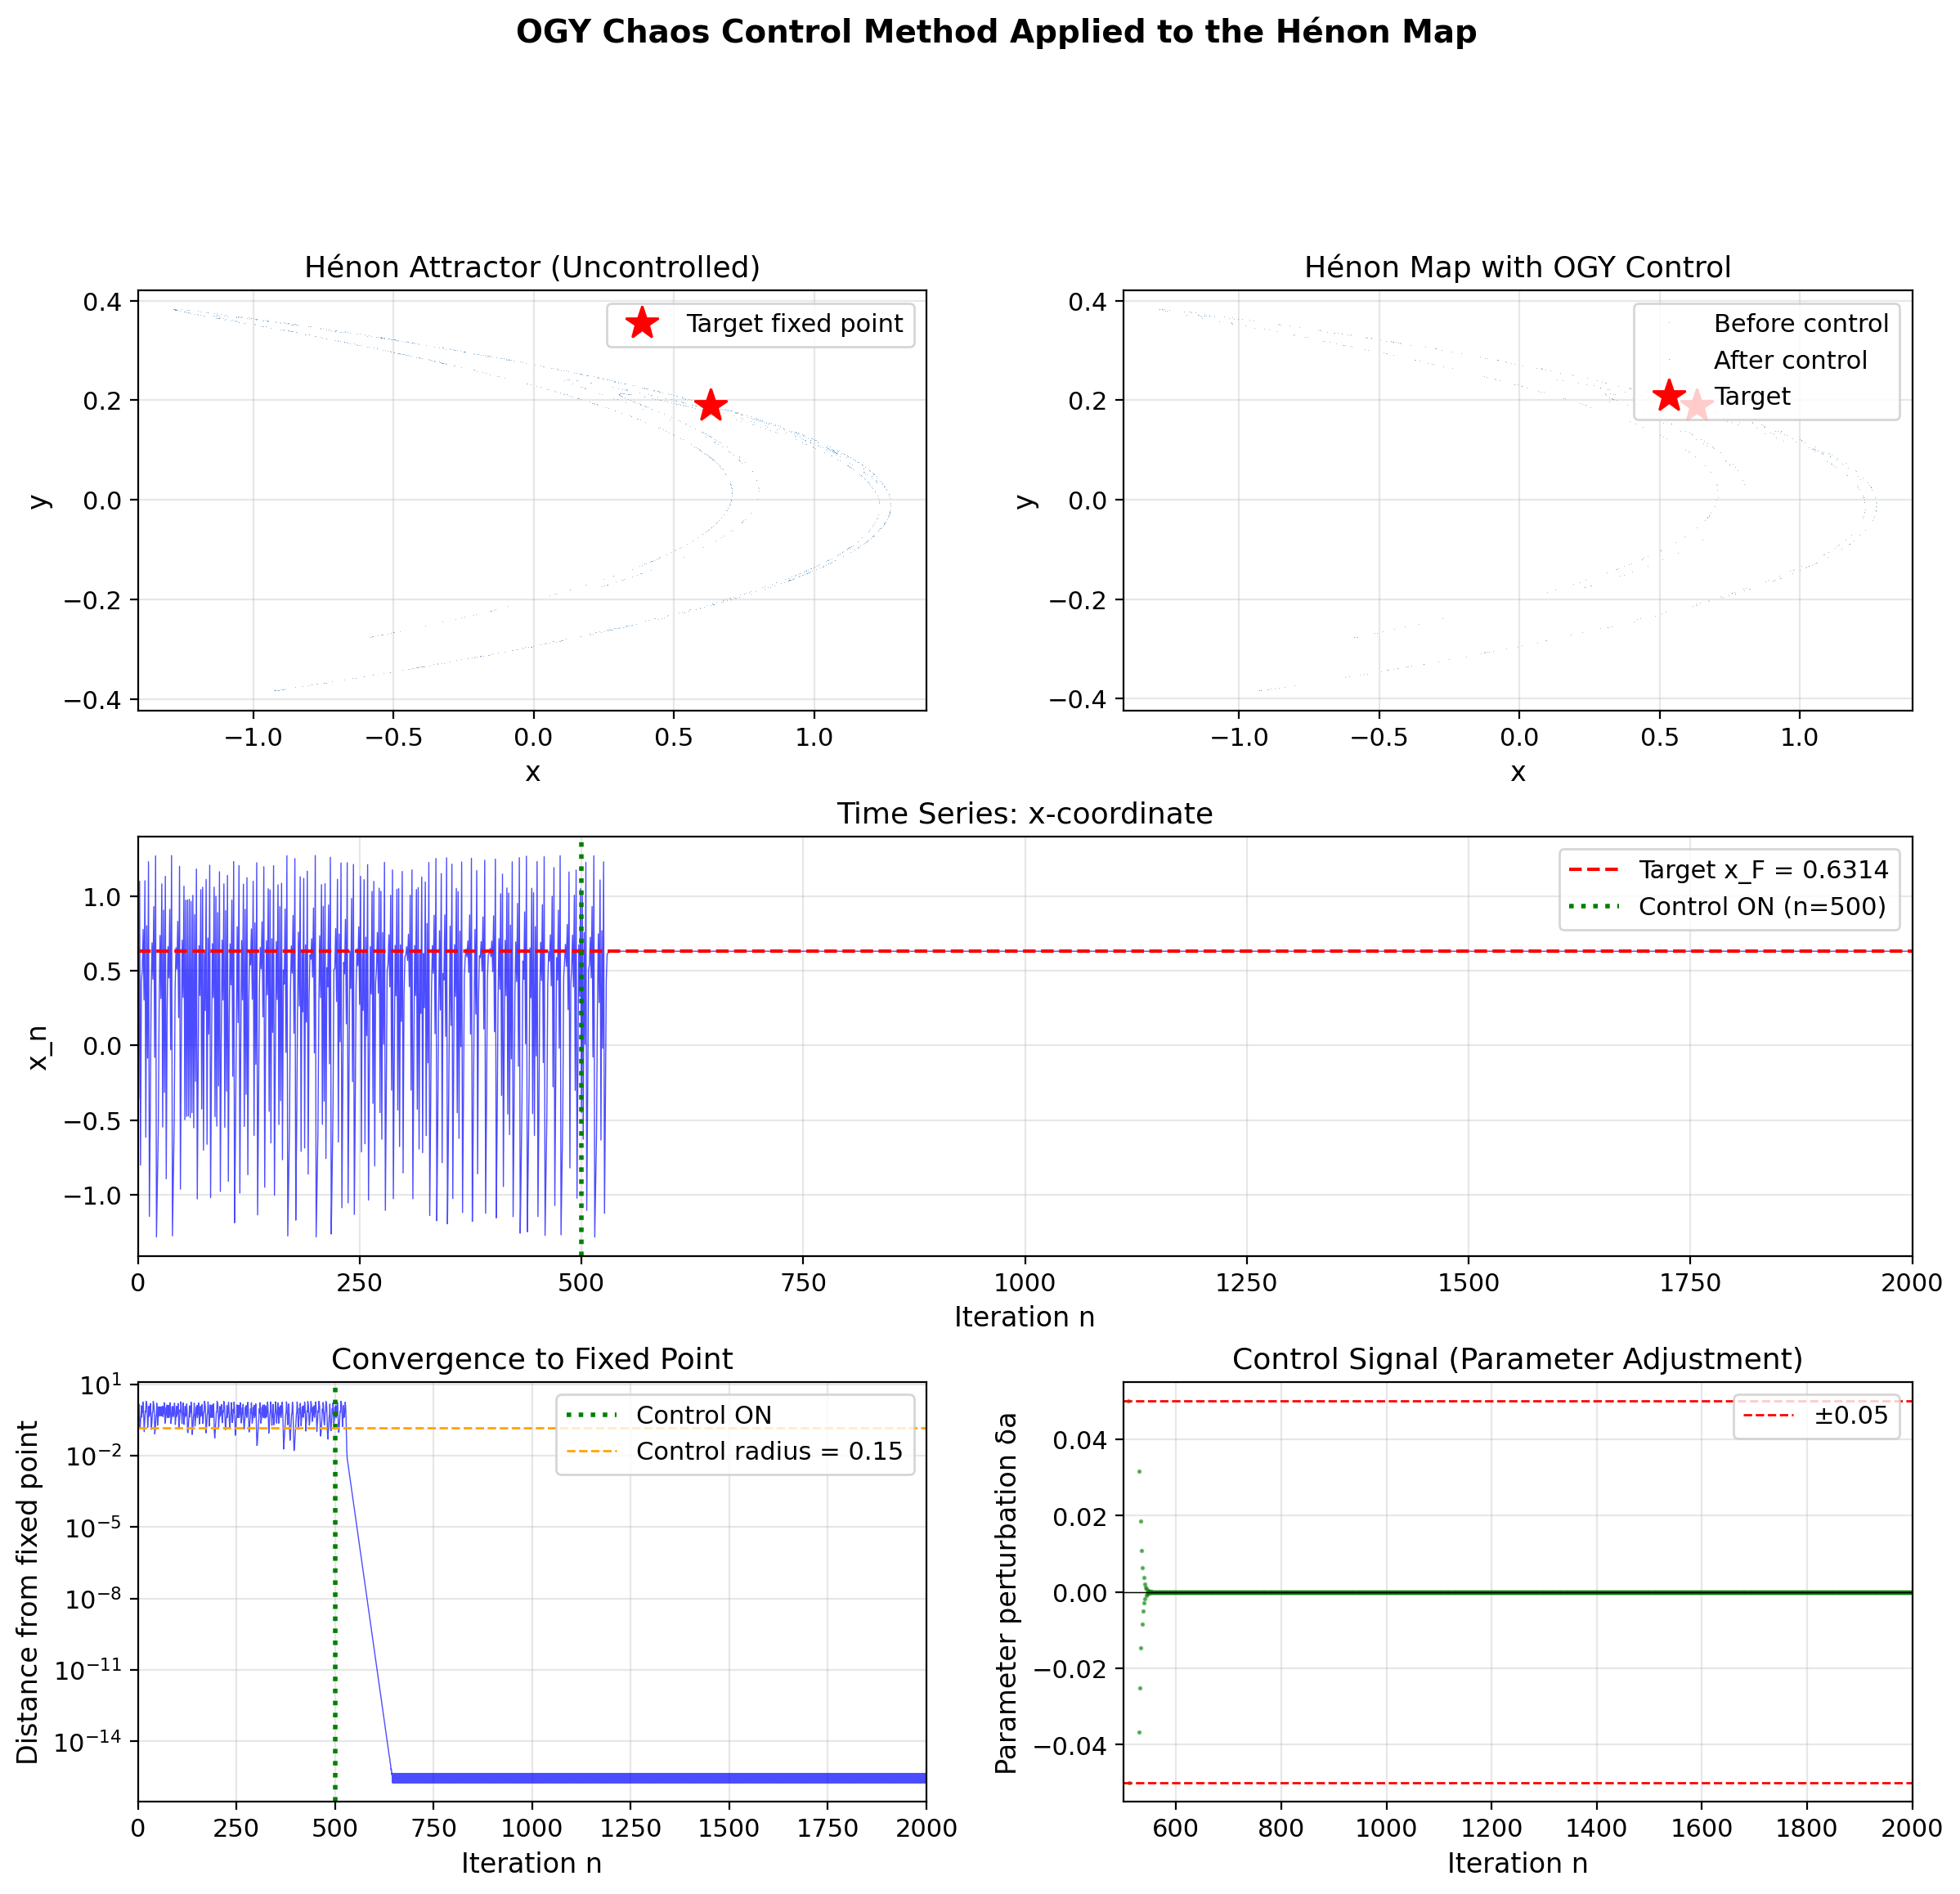


Figure saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.25)

# Plot 1: Phase space - Uncontrolled
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x_nc[500:], y_nc[500:], ',', color='steelblue', alpha=0.5, markersize=1)
ax1.plot(henon.x_f, henon.y_f, 'r*', markersize=15, label='Target fixed point')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Hénon Attractor (Uncontrolled)')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Phase space - Controlled
ax2 = fig.add_subplot(gs[0, 1])
# Before control
ax2.plot(x[:control_start], y[:control_start], ',', 
         color='steelblue', alpha=0.5, markersize=1, label='Before control')
# After control
ax2.plot(x[control_start:], y[control_start:], ',', 
         color='forestgreen', alpha=0.7, markersize=1, label='After control')
ax2.plot(henon.x_f, henon.y_f, 'r*', markersize=15, label='Target')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Hénon Map with OGY Control')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Time series of x coordinate
ax3 = fig.add_subplot(gs[1, :])
iterations = np.arange(n_total)
ax3.plot(iterations, x, 'b-', linewidth=0.5, alpha=0.7)
ax3.axhline(y=henon.x_f, color='r', linestyle='--', linewidth=1.5, label=f'Target x_F = {henon.x_f:.4f}')
ax3.axvline(x=control_start, color='g', linestyle=':', linewidth=2, label=f'Control ON (n={control_start})')
ax3.set_xlabel('Iteration n')
ax3.set_ylabel('x_n')
ax3.set_title('Time Series: x-coordinate')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_xlim([0, n_total])

# Plot 4: Distance from fixed point
ax4 = fig.add_subplot(gs[2, 0])
distance = np.sqrt((x - henon.x_f)**2 + (y - henon.y_f)**2)
ax4.semilogy(iterations, distance, 'b-', linewidth=0.5, alpha=0.7)
ax4.axvline(x=control_start, color='g', linestyle=':', linewidth=2, label='Control ON')
ax4.axhline(y=control_radius, color='orange', linestyle='--', 
            linewidth=1, label=f'Control radius = {control_radius}')
ax4.set_xlabel('Iteration n')
ax4.set_ylabel('Distance from fixed point')
ax4.set_title('Convergence to Fixed Point')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, n_total])

# Plot 5: Parameter perturbation
ax5 = fig.add_subplot(gs[2, 1])
perturbation = a_vals - henon.a0
ax5.plot(iterations[ctrl], perturbation[ctrl], 'g.', markersize=2, alpha=0.5)
ax5.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax5.axhline(y=max_perturbation, color='r', linestyle='--', 
            linewidth=1, label=f'±{max_perturbation}')
ax5.axhline(y=-max_perturbation, color='r', linestyle='--', linewidth=1)
ax5.set_xlabel('Iteration n')
ax5.set_ylabel('Parameter perturbation δa')
ax5.set_title('Control Signal (Parameter Adjustment)')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)
ax5.set_xlim([control_start, n_total])

plt.suptitle('OGY Chaos Control Method Applied to the Hénon Map', 
             fontsize=14, fontweight='bold', y=1.02)

plt.savefig('chaos_control_ogy_method_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to 'plot.png'")

## Analysis of Results

### Key Observations

1. **Rapid Stabilization**: Once the trajectory naturally approaches the target fixed point (within the control radius), the OGY method rapidly stabilizes it with small perturbations.

2. **Small Control Effort**: The parameter perturbations $\delta a$ remain within the prescribed bounds, demonstrating that chaos can be controlled efficiently.

3. **Waiting Time**: The chaotic trajectory must first wander close to the target before control can be applied. This is the characteristic "waiting time" of the OGY method.

### Limitations

- **Target Accessibility**: The target UPO must be reachable by the chaotic dynamics
- **Noise Sensitivity**: Real systems require robust variants like time-delay feedback
- **Single Parameter Control**: Higher-dimensional systems may need multiple control parameters

### Applications

The OGY method and its variants have been applied to:
- Stabilizing laser dynamics
- Cardiac arrhythmia control
- Chemical reaction regulation
- Mechanical vibration suppression

In [6]:
# Quantitative analysis
print("\n" + "="*50)
print("QUANTITATIVE ANALYSIS")
print("="*50)

# Find when control first succeeded (stayed near fixed point)
after_control = distance[control_start:]
stable_threshold = 0.01

# Find first time trajectory stays within threshold
for i in range(len(after_control) - 50):
    if np.all(after_control[i:i+50] < stable_threshold):
        stabilization_time = control_start + i
        break
else:
    stabilization_time = None

if stabilization_time:
    print(f"\nStabilization achieved at iteration: {stabilization_time}")
    print(f"Time to stabilize after control ON: {stabilization_time - control_start} iterations")
else:
    print("\nNote: Full stabilization may require longer simulation")

# Statistics of control effort
active_perturbations = perturbation[ctrl]
if len(active_perturbations) > 0:
    print(f"\nControl Effort Statistics:")
    print(f"  Mean |δa|: {np.mean(np.abs(active_perturbations)):.6f}")
    print(f"  Max |δa|: {np.max(np.abs(active_perturbations)):.6f}")
    print(f"  RMS δa: {np.sqrt(np.mean(active_perturbations**2)):.6f}")

# Final distance from fixed point
final_distance = np.mean(distance[-100:])
print(f"\nFinal average distance from fixed point: {final_distance:.6f}")


QUANTITATIVE ANALYSIS

Stabilization achieved at iteration: 531
Time to stabilize after control ON: 31 iterations

Control Effort Statistics:
  Mean |δa|: 0.000186
  Max |δa|: 0.050000
  RMS δa: 0.002449

Final average distance from fixed point: 0.000000


## Conclusion

The OGY method demonstrates a profound principle: **the very sensitivity that makes chaotic systems unpredictable also makes them controllable**. By computing the local geometry of the phase space (eigenvalues and eigenvectors of the Jacobian), we can design minimal interventions that steer trajectories onto desired periodic orbits.

This notebook has shown:
1. The mathematical foundation of the OGY control law
2. Its application to the Hénon map as a canonical example
3. Visualization of successful chaos control with bounded perturbations

The elegance of the OGY method lies in its exploitation of the dense set of unstable periodic orbits within any chaotic attractor—what appears as chaos contains hidden order that can be revealed and stabilized through intelligent control.